In [1]:
# This is for checking the calibration of parameters 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = '../../Data/CareerHistory/0133/0133_ver2.dat'
df = pd.read_csv(file, sep = '\t')

In [4]:
# Exclude Tokyo, Kanagawa, Osaka, Kyoto, Hyogo, Aichi 
df = df.loc[(df.q3 != 12) & (df.q3 != 14) & (df.q3 != 29) &(df.q3 != 26)& (df.q3 != 30) & (df.q3 != 21) & (df.q3 != 47)].copy()

In [5]:
# Exclude data with missing first job location
df = df.loc[(df.q15_3 != 50) & (df.q15_3 != 98) & (df.q15_3 != 99) &(df.q15_3 != 49)].copy()

In [6]:
# Create columns for move history

In [7]:
df['moved_pref_first_job'] = 0
df.loc[df.q3 != df.q15_3, 'moved_pref_first_job'] = 1

In [8]:
df['moved_within_pref_first_job'] = 0
df.loc[(df.q3 == df.q15_3) & (df.q3_toshiruikei != df.q15_3_toshiruikei), 'moved_within_pref_first_job'] = 1

In [9]:
df['moved_first_job'] = df['moved_pref_first_job'] + df['moved_within_pref_first_job']

In [10]:
year = 1981

In [11]:
df['birth_year'] = year - df.q1

In [12]:
df['first_job_year'] = df['birth_year'] + df.q15_9_1

In [13]:
df['counts'] = 1

In [14]:
df['moved_pref'] = 0
df.loc[df.kyojuuchi != df.q3, 'moved_pref'] = 1

In [15]:
# Create columns for educational attainment
df['new_middle'] = 0
df.loc[df.q26_1 == 7, 'new_middle'] = 1

df['new_high'] = 0
df.loc[df.q26_1 == 8, 'new_high'] = 1

df['new_junior_college'] = 0
df.loc[df.q26_1 == 9, 'new_junior_college'] = 1

df['new_college'] = 0
df.loc[df.q26_1 == 10, 'new_college'] = 1

df['old_elementary'] = 0
df.loc[df.q26_1 == 1, 'old_elementary'] = 1

df['old_upper_elementary'] = 0
df.loc[df.q26_1 == 2, 'old_upper_elementary'] = 1

df['old_vocational'] = 0
df.loc[df.q26_1 == 3, 'old_vocational'] = 1

df['old_middle'] = 0
df.loc[df.q26_1 == 4, 'old_middle'] = 1

df['old_high'] = 0
df.loc[df.q26_1 == 5, 'old_high'] = 1

df['old_college'] = 0
df.loc[df.q26_1 == 6, 'old_college'] = 1

df['high'] = df['new_high'] + df['old_high']

df['middle'] = df['new_middle'] + df['old_middle'] + df['old_vocational'] + df['old_upper_elementary']

df['college'] = df['new_college'] + df['old_college']

In [16]:
# Create columns for the job matching means for the first job
df['first_job_school'] = 0
df.loc[df.q15_8 == 3, 'first_job_school'] = 1

df['first_job_pub_emp'] = 0
df.loc[df.q15_8 == 4, 'first_job_pub_emp'] = 1

df['first_job_conn'] = 0
df.loc[df.q15_8 == 1, 'first_job_conn'] = 1
df.loc[df.q15_8 == 2, 'first_job_conn'] = 1

df['first_job_adv'] = 0
df.loc[df.q15_8 == 5, 'first_job_adv'] = 1

df['first_job_other'] = 0
df.loc[df.q15_8 == 6, 'first_job_other'] = 1

df['first_job_self'] = 0
df.loc[df.q15_8 == 7, 'first_job_self'] = 1

In [51]:
def plot_graphs(year_column, data_column, title, label1, label2, filename):
    
    _df = df[[year_column, data_column, 'counts']].copy()
    
    if year_column == 'first_job_year':
        _df = _df.loc[(_df[year_column] <= 1975) & (_df[year_column] >= 1927)]
    
    _df_group = _df.groupby([year_column])[[data_column, 'counts']].sum().reset_index()
    _df_group['data_ratio'] = _df_group[data_column] / _df_group.counts
    _df_group['ratio_SMA_5'] = _df_group['data_ratio'].rolling(window = 5).mean()
    
    fig, ax = plt.subplots()
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.rc('pgf', texsystem = 'pdflatex')
    
    _df_group.plot(x = year_column, y = 'data_ratio', ax = ax, label = label1,linestyle = '--',
               color = 'b',)
    _df_group.plot(x = year_column, y = 'ratio_SMA_5', ax = ax, label = label2, alpha = 0.7)
    
    fig.set_size_inches(w=6.26894, h=3.5)    
    plt.xlabel('year')
    
    title = r'\textbf{' + title + '}'
    plt.title(title)
    plt.savefig(filename)
    plt.show()

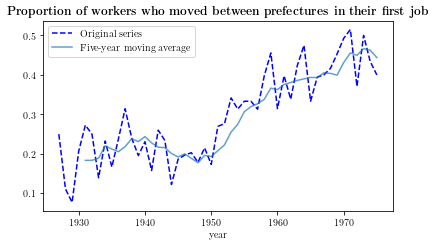

In [49]:
title = r'Proportion of workers who moved between prefectures in their first job'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = '../../Notes/Discussion/moved_pref_first_job.pgf'
plot_graphs('first_job_year', 'moved_pref_first_job', title, label1, label2, filename)

In [19]:
'\textbf{' + title + '}'

'\textbf{Proportion of workers who moved between prefectures in their first job}'

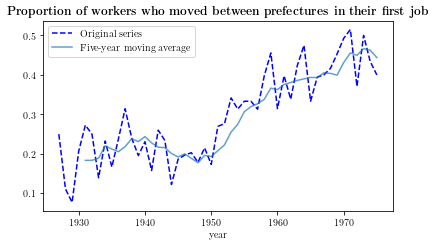

In [20]:
title = r'Proportion of workers who moved between prefectures in their first job'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = '../../Graphs/pdf/moved_pref_first_job.pdf'
plot_graphs('first_job_year', 'moved_pref_first_job', title, label1, label2, filename)

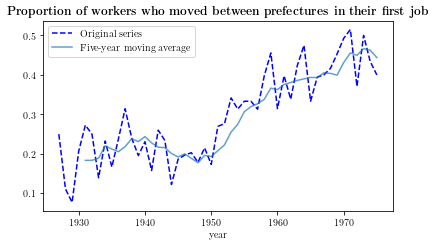

In [21]:
title = r'Proportion of workers who moved between prefectures in their first job'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = '../../Notes/Discussion/moved_pref_first_job.pgf'
plot_graphs('first_job_year', 'moved_pref_first_job', title, label1, label2, filename)

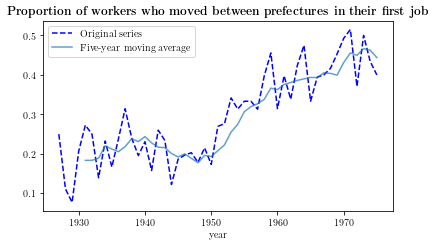

In [22]:
title = r'Proportion of workers who moved between prefectures in their first job'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = '../../Notes/Discussion/moved_pref_first_job.pgf'
plot_graphs('first_job_year', 'moved_pref_first_job', title, label1, label2, filename)

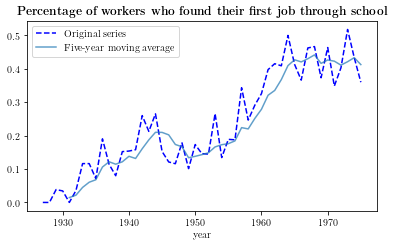

In [23]:
title = r'Percentage of workers who found their first job through school'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = '../../Notes/Discussion/first_job_school.pgf'
plot_graphs('first_job_year', 'first_job_school', title, label1, label2, filename)

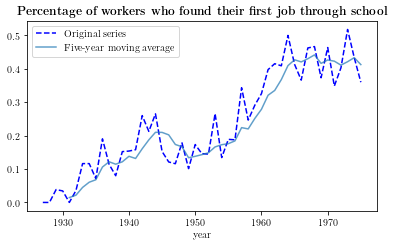

In [98]:
title = r'Percentage of workers who found their first job through school'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = '../../Graphs/pdf/first_job_school.pdf'
plot_graphs('first_job_year', 'first_job_school', title, label1, label2, filename)

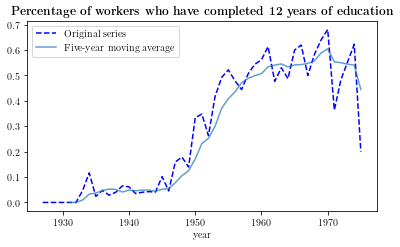

In [24]:
title = r'Percentage of workers who have completed 12 years of education'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = '../../Notes/Discussion/educ_high.pgf'
plot_graphs('first_job_year', 'high', title, label1, label2, filename)

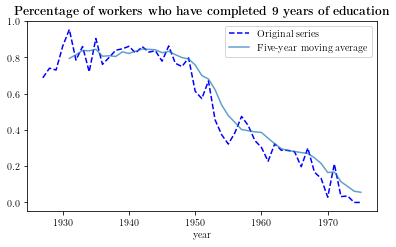

In [25]:
title = r'Percentage of workers who have completed 9 years of education'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = '../../Notes/Discussion/educ_middle.pgf'
plot_graphs('first_job_year', 'middle', title, label1, label2, filename)

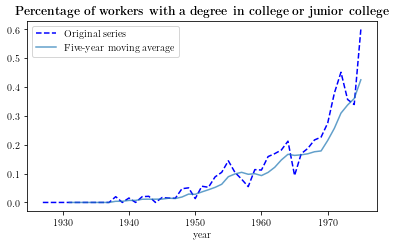

In [26]:
title = r'Percentage of workers with a degree in college or junior college'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = '../../Notes/Discussion/educ_college.pgf'
plot_graphs('first_job_year', 'college', title, label1, label2, filename)

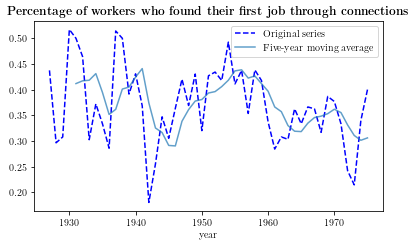

In [27]:
title = r'Percentage of workers who found their first job through connections'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = '../../Notes/Discussion/first_job_conn.pgf'
plot_graphs('first_job_year', 'first_job_conn', title, label1, label2, filename)

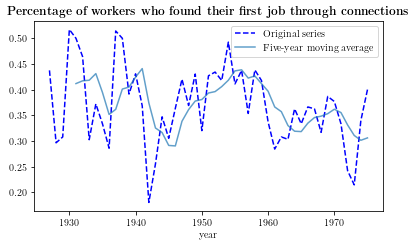

In [97]:
title = r'Percentage of workers who found their first job through connections'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = '../../Graphs/pdf/first_job_conn.pdf'
plot_graphs('first_job_year', 'first_job_conn', title, label1, label2, filename)

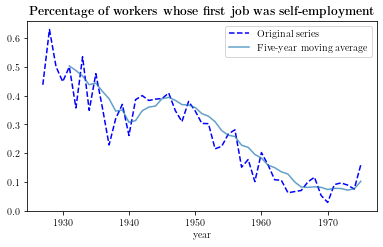

In [28]:
title = r'Percentage of workers whose first job was self-employment'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = '../../Notes/Discussion/first_job_self.pgf'
plot_graphs('first_job_year', 'first_job_self', title, label1, label2, filename)

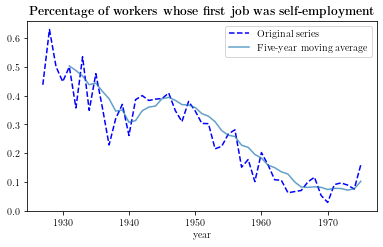

In [95]:
title = r'Percentage of workers whose first job was self-employment'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = '../../Graphs/pdf/first_job_self.pdf'
plot_graphs('first_job_year', 'first_job_self', title, label1, label2, filename)

In [52]:
def plot_graphs_subsample(year_column, data_column, subsample, title, label1, label2, filename):
    
    _df = df[[year_column, data_column, subsample,'counts']].copy()
    _df = _df.loc[_df[subsample] == 1,:]
    
    if year_column == 'first_job_year':
        _df = _df.loc[(_df[year_column] <= 1975) & (_df[year_column] >= 1927)]
    
    _df_group = _df.groupby([year_column])[[data_column, 'counts']].sum().reset_index()
    _df_group['data_ratio'] = _df_group[data_column] / _df_group.counts
    _df_group['ratio_SMA_5'] = _df_group['data_ratio'].rolling(window = 5).mean()
    
    fig, ax = plt.subplots()
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.rc('pgf', texsystem = 'pdflatex')
    
    _df_group.plot(x = year_column, y = 'data_ratio', ax = ax, label = label1, color = 'b', linestyle = '--')
    _df_group.plot(x = year_column, y = 'ratio_SMA_5', ax = ax, label = label2, alpha = 0.7)
    
    fig.set_size_inches(w=6.26894, h=3.5)    
    plt.xlabel('year')
    
    title = r'\textbf{' + title + '}'
    plt.title(title)
    plt.savefig(filename)
    plt.show()

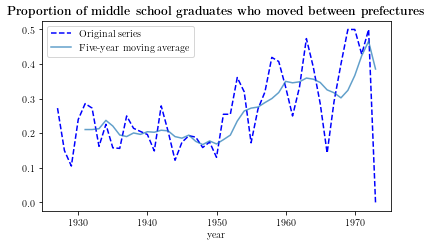

In [53]:
title = r'Proportion of middle school graduates who moved between prefectures'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/moved_pref_first_job_middle.pgf'
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'middle', title, label1, label2, filename)

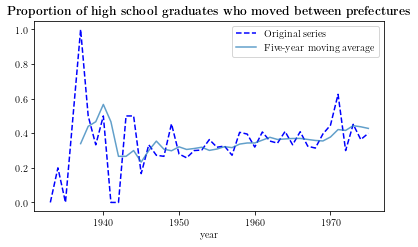

In [54]:
title = r'Proportion of high school graduates who moved between prefectures'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/moved_pref_first_job_high.pgf'
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'high', title, label1, label2, filename)

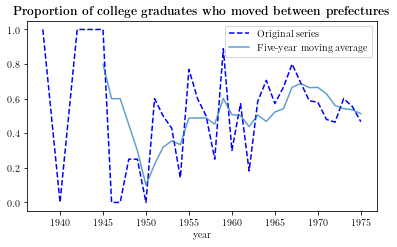

In [55]:
title = r'Proportion of college graduates who moved between prefectures'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/moved_pref_first_job_college.pgf'
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'college', title, label1, label2, filename)

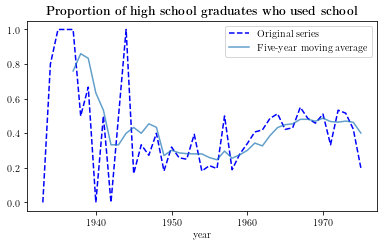

In [56]:
title = r'Proportion of high school graduates who used school'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/school_first_job_high.pgf'
plot_graphs_subsample('first_job_year', 'first_job_school', 'high', title, label1, label2, filename)

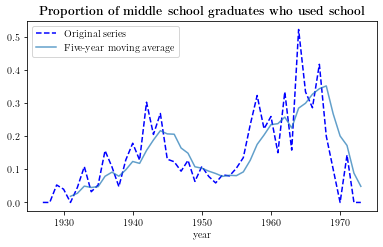

In [57]:
title = r'Proportion of middle school graduates who used school'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/school_first_job_middle.pgf'
plot_graphs_subsample('first_job_year', 'first_job_school', 'middle', title, label1, label2, filename)

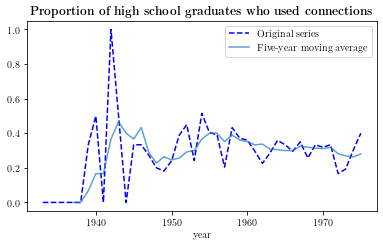

In [58]:
title = r'Proportion of high school graduates who used connections'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/conn_first_job_high.pgf'
plot_graphs_subsample('first_job_year', 'first_job_conn', 'high', title, label1, label2, filename)

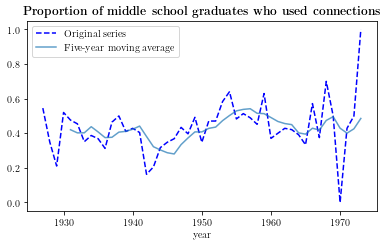

In [59]:
title = r'Proportion of middle school graduates who used connections'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/conn_first_job_middle.pgf'
plot_graphs_subsample('first_job_year', 'first_job_conn', 'middle', title, label1, label2, filename)

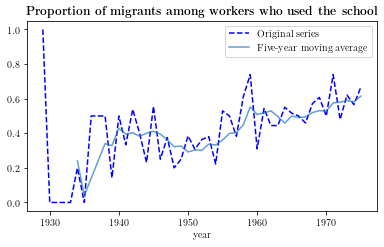

In [60]:
title = r'Proportion of migrants among workers who used the school'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/moved_pref_school.pgf'
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'first_job_school', title, label1, label2, filename)

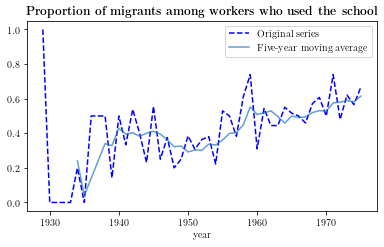

In [101]:
title = r'Proportion of migrants among workers who used the school'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Graphs/pdf/moved_pref_school.pdf'
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'first_job_school', title, label1, label2, filename)

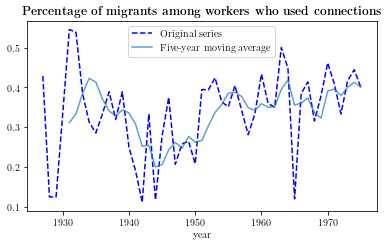

In [61]:
title = r'Percentage of migrants among workers who used connections'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/moved_pref_conn.pgf'
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'first_job_conn', title, label1, label2, filename)

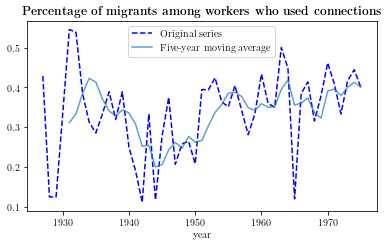

In [100]:
title = r'Percentage of migrants among workers who used connections'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Graphs/pdf/moved_pref_conn.pdf'
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'first_job_conn', title, label1, label2, filename)

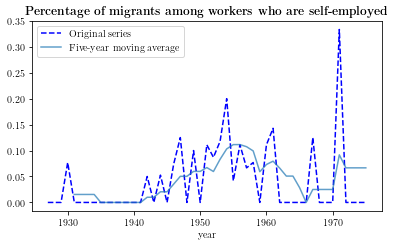

In [62]:
title = r'Percentage of migrants among workers who are self-employed'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/moved_pref_self.pgf'
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'first_job_self', title, label1, label2, filename)

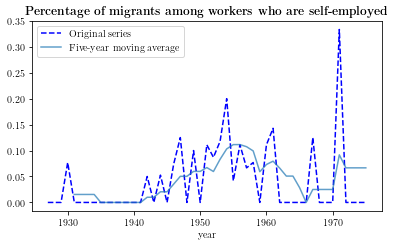

In [99]:
title = r'Percentage of migrants among workers who are self-employed'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Graphs/pdf/moved_pref_self.pdf'
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'first_job_self', title, label1, label2, filename)

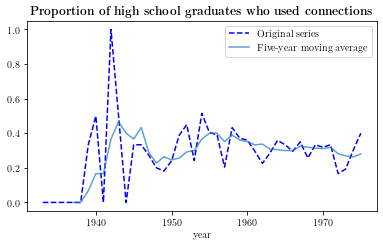

In [63]:
title = r'Proportion of high school graduates who used connections'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/conn_first_job_high.pgf'
plot_graphs_subsample('first_job_year', 'first_job_conn', 'high', title, label1, label2, filename)

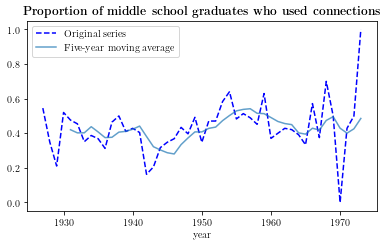

In [64]:
title = r'Proportion of middle school graduates who used connections'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/conn_first_job_middle.pgf'
plot_graphs_subsample('first_job_year', 'first_job_conn', 'middle', title, label1, label2, filename)

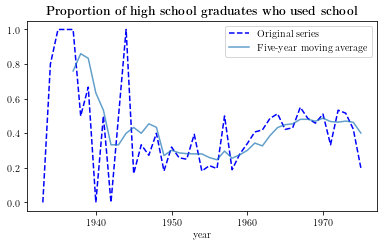

In [65]:
title = r'Proportion of high school graduates who used school'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/school_first_job_high.pgf'
plot_graphs_subsample('first_job_year', 'first_job_school', 'high', title, label1, label2, filename)

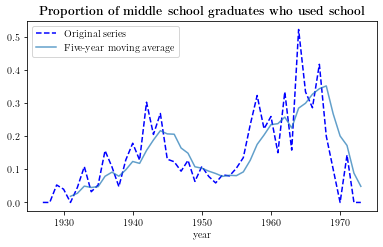

In [66]:
title = r'Proportion of middle school graduates who used school'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/school_first_job_middle.pgf'
plot_graphs_subsample('first_job_year', 'first_job_school', 'middle', title, label1, label2, filename)

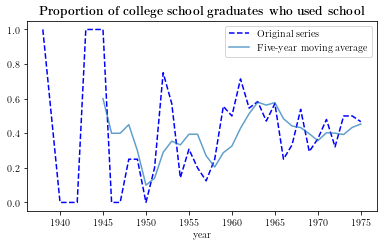

In [67]:
title = r'Proportion of college school graduates who used school'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/school_first_job_college.pgf'
plot_graphs_subsample('first_job_year', 'first_job_school', 'college', title, label1, label2, filename)

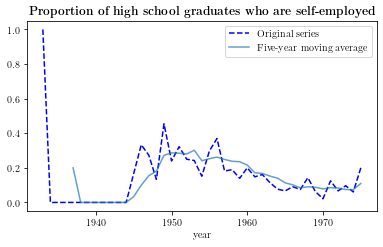

In [68]:
title = r'Proportion of high school graduates who are self-employed'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/self_first_job_high.pgf'
plot_graphs_subsample('first_job_year', 'first_job_self', 'high', title, label1, label2, filename)

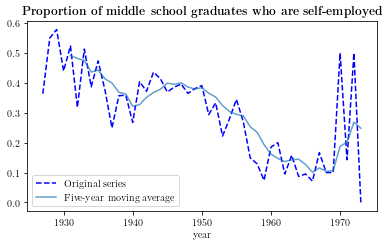

In [69]:
title = r'Proportion of middle school graduates who are self-employed'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/self_first_job_middle.pgf'
plot_graphs_subsample('first_job_year', 'first_job_self', 'middle', title, label1, label2, filename)

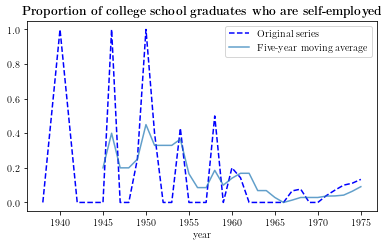

In [70]:
title = r'Proportion of college school graduates who are self-employed'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/self_first_job_college.pgf'
plot_graphs_subsample('first_job_year', 'first_job_self', 'college', title, label1, label2, filename)

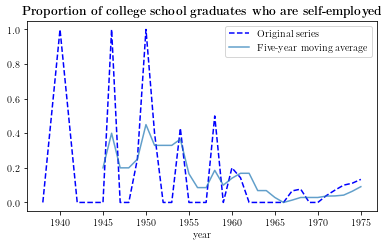

In [71]:
title = r'Proportion of college school graduates who are self-employed'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/self_first_job_college.pgf'
plot_graphs_subsample('first_job_year', 'first_job_self', 'college', title, label1, label2, filename)

In [75]:
df['first_job_aff'] = 0
df.loc[df.q15_4 == (1 or 6 or 8 or 9), 'first_job_aff'] = 1

In [76]:
df.first_job_aff

0       0
1       0
2       0
3       0
4       0
       ..
4213    1
4216    1
4238    0
4243    0
4244    0
Name: first_job_aff, Length: 3069, dtype: int64

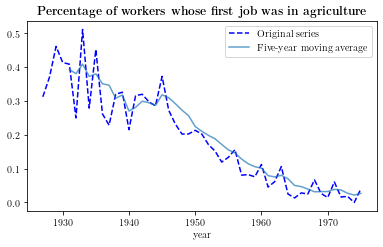

In [82]:
title = r'Percentage of workers whose first job was in agriculture'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = '../../Notes/Discussion/first_job_aff.pgf'
plot_graphs('first_job_year', 'first_job_aff', title, label1, label2, filename)

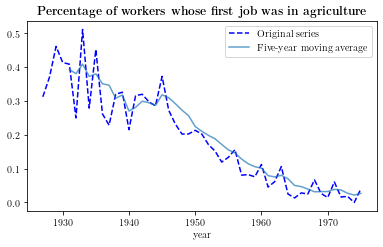

In [94]:
title = r'Percentage of workers whose first job was in agriculture'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = '../../Graphs/pdf/first_job_aff.pdf'
plot_graphs('first_job_year', 'first_job_aff', title, label1, label2, filename)

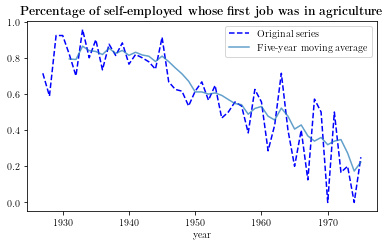

In [87]:
title = r'Percentage of self-employed whose first job was in agriculture'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/self_first_job_aff.pgf'
plot_graphs_subsample('first_job_year', 'first_job_aff', 'first_job_self', title, label1, label2, filename)

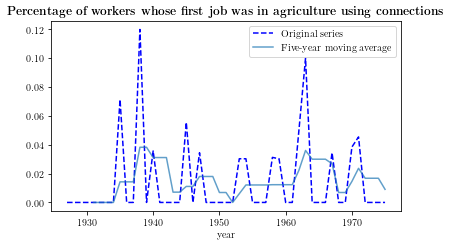

In [88]:
title = r'Percentage of workers whose first job was in agriculture using connections'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/conn_first_job_aff.pgf'
plot_graphs_subsample('first_job_year', 'first_job_aff', 'first_job_conn', title, label1, label2, filename)

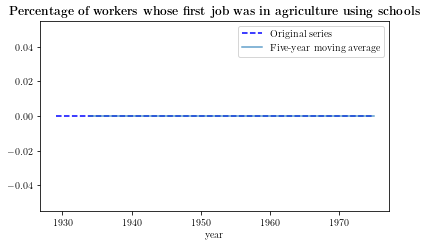

In [89]:
title = r'Percentage of workers whose first job was in agriculture using schools'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/school_first_job_aff.pgf'
plot_graphs_subsample('first_job_year', 'first_job_aff', 'first_job_school', title, label1, label2, filename)

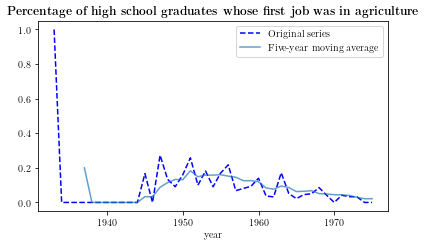

In [93]:
title = r'Percentage of high school graduates whose first job was in agriculture'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/high_first_job_aff.pgf'
plot_graphs_subsample('first_job_year', 'first_job_aff', 'high', title, label1, label2, filename)

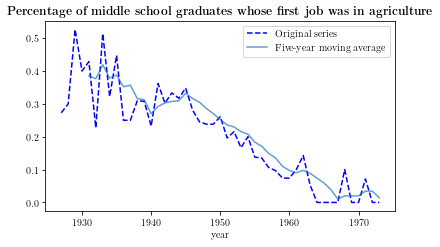

In [92]:
title = r'Percentage of middle school graduates whose first job was in agriculture'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/middle_first_job_aff.pgf'
plot_graphs_subsample('first_job_year', 'first_job_aff', 'middle', title, label1, label2, filename)